# Linear Regression

1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building
7. Model Diagnostics
8. Predictions and Evaluations

## 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

## 2. Load Data

In [2]:
# Loading the dataset
df = pd.read_csv("F:/Numyard/1_Data_Project_LifeExpectancy_LinearRegression.csv")

## 3. Understanding the data

In [3]:
#Pandas dataframe.info() function is used to get a concise summary of the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
# Exploring the dataset
df.shape

(2938, 22)

# Missing values

In [5]:
# Checking the null values in the dataset
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
#The describe() function computes a summary of statistics pertaining to the DataFrame columns.
df.describe()  

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [7]:
# print the 5 records of the dataset by default. Pass number how many record you want look
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [8]:
# print the last 5 records of the dataset by default. Pass number how many record you want look
df.tail()

Country  Year      Status  Life expectancy   Adult Mortality  \
2933  Zimbabwe  2004  Developing              44.3            723.0   
2934  Zimbabwe  2003  Developing              44.5            715.0   
2935  Zimbabwe  2002  Developing              44.8             73.0   
2936  Zimbabwe  2001  Developing              45.3            686.0   
2937  Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2933             27     4.36                     0.0         68.0        31   
2934             26     4.06                     0.0          7.0       998   
2935             25     4.43                     0.0         73.0       304   
2936             25     1.72                     0.0         76.0       529   
2937             24     1.68                     0.0         79.0      1483   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
2933   27.1                  42   67.0               7.13         65.0   
2934   26.7                  41    7.0               6.52         68.0   
2935   26.3                  40   73.0               6.53         71.0   
2936   25.9                  39   76.0               6.16         75.0   
2937   25.5                  39   78.0               7.10         78.0   

       HIV/AIDS         GDP  Population   thinness  1-19 years  \
2933       33.6  454.366654  12777511.0                    9.4   
2934       36.7  453.351155  12633897.0                    9.8   
2935       39.8   57.348340    125525.0                    1.2   
2936       42.1  548.587312  12366165.0                    1.6   
2937       43.5  547.358879  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  
2933                  9.4                            0.407        9.2  
2934                  9.9                            0.418        9.5  
2935                  1.3                            0.427       10.0  
2936                  1.7                            0.427        9.8  
2937                 11.2                            0.434        9.8

In [9]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


## 4. Data Pre-processing

In [10]:
# Remove the extra space from column names

df = df.rename(columns=lambda x: x.strip())

In [11]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Status'. 
df['Status']= label_encoder.fit_transform(df['Status'])
  
df.head(10)

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan  2015       1             65.0            263.0             62   
1  Afghanistan  2014       1             59.9            271.0             64   
2  Afghanistan  2013       1             59.9            268.0             66   
3  Afghanistan  2012       1             59.5            272.0             69   
4  Afghanistan  2011       1             59.2            275.0             71   
5  Afghanistan  2010       1             58.8            279.0             74   
6  Afghanistan  2009       1             58.6            281.0             77   
7  Afghanistan  2008       1             58.1            287.0             80   
8  Afghanistan  2007       1             57.5            295.0             82   
9  Afghanistan  2006       1             57.3            295.0             84   

   Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0     0.01               71.279624         65.0     1154  19.1   
1     0.01               73.523582         62.0      492  18.6   
2     0.01               73.219243         64.0      430  18.1   
3     0.01               78.184215         67.0     2787  17.6   
4     0.01                7.097109         68.0     3013  17.2   
5     0.01               79.679367         66.0     1989  16.7   
6     0.01               56.762217         63.0     2861  16.2   
7     0.03               25.873925         64.0     1599  15.7   
8     0.02               10.910156         63.0     1141  15.2   
9     0.03               17.171518         64.0     1990  14.7   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   
5                102   66.0               9.20        66.0       0.1   
6                106   63.0               9.42        63.0       0.1   
7                110   64.0               8.33        64.0       0.1   
8                113   63.0               6.73        63.0       0.1   
9                116   58.0               7.43        58.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   
5  553.328940   2883167.0                  18.4                18.4   
6  445.893298    284331.0                  18.6                18.7   
7  373.361116   2729431.0                  18.8                18.9   
8  369.835796  26616792.0                  19.0                19.1   
9  272.563770   2589345.0                  19.2                19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1

In [12]:
print(df.isna().sum())
print(df.shape)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64
(2938, 22)


In [13]:
# Replace using mean 
for i in df.columns.drop('Country'):
    df[i].fillna(df[i].mean(), inplace = True)

## 5. Exploratory Data Analysis

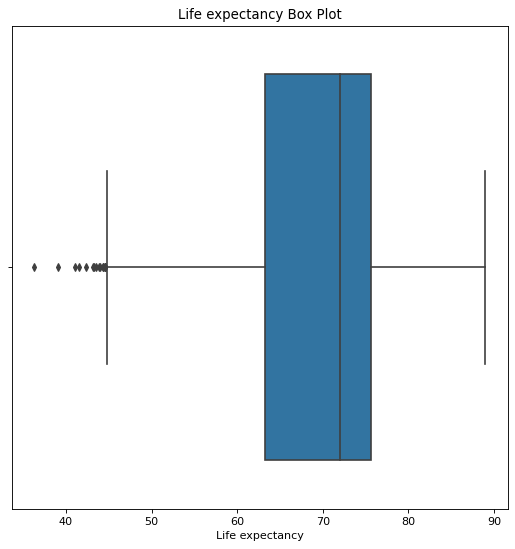

In [14]:
# Let's check the distribution of y variable (Life Expectancy)
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df['Life expectancy'])
plt.title('Life expectancy Box Plot')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


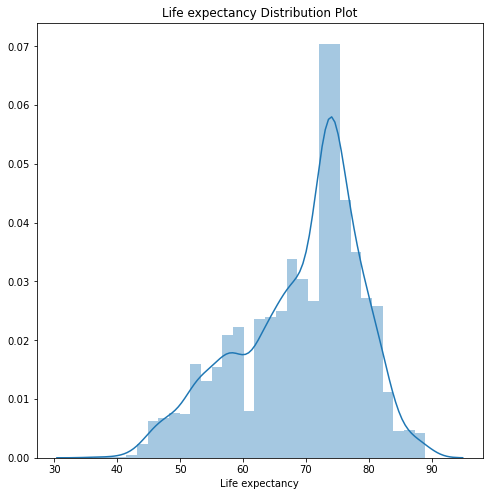

In [15]:
plt.figure(figsize=(8,8))
plt.title('Life expectancy Distribution Plot')
sns.distplot(df['Life expectancy']);

#### Summary : 

The y variable is having very few outliers and is almost linearly distributed. So the assumption for linear regression holds true

In [16]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country'], dtype='object')


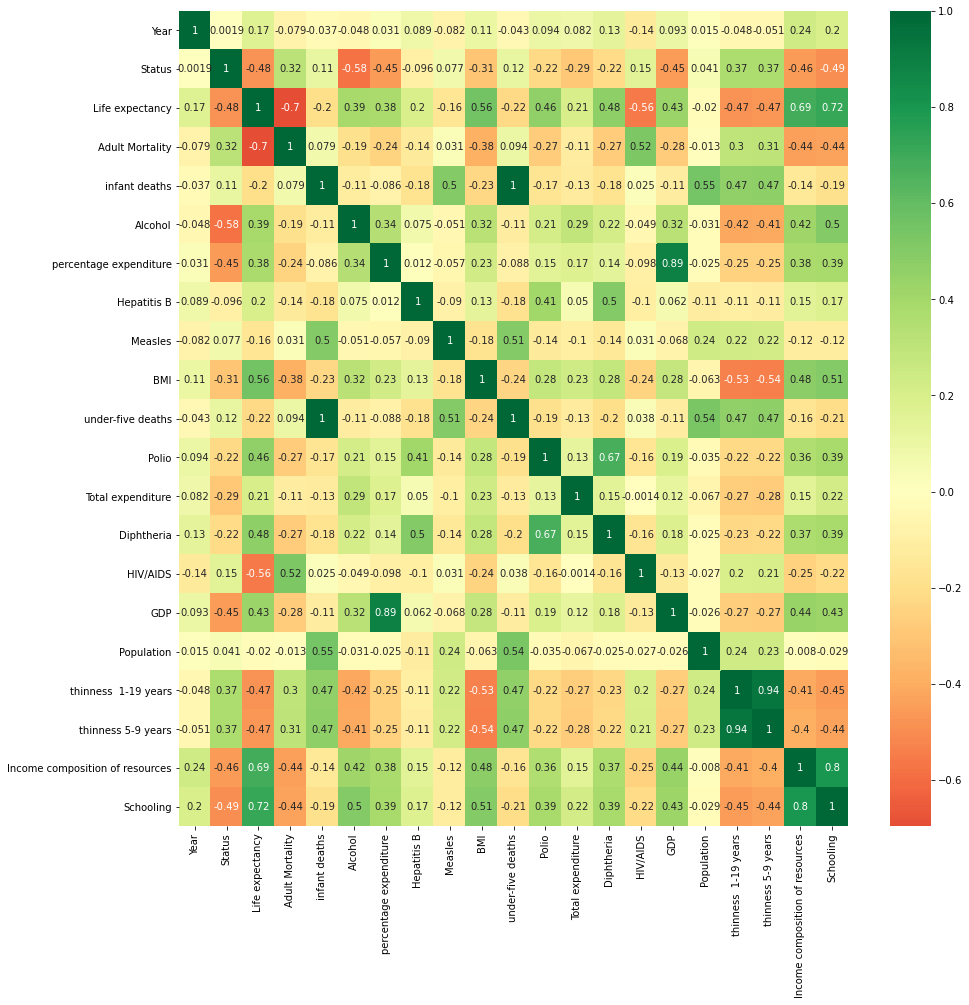

In [17]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0) 

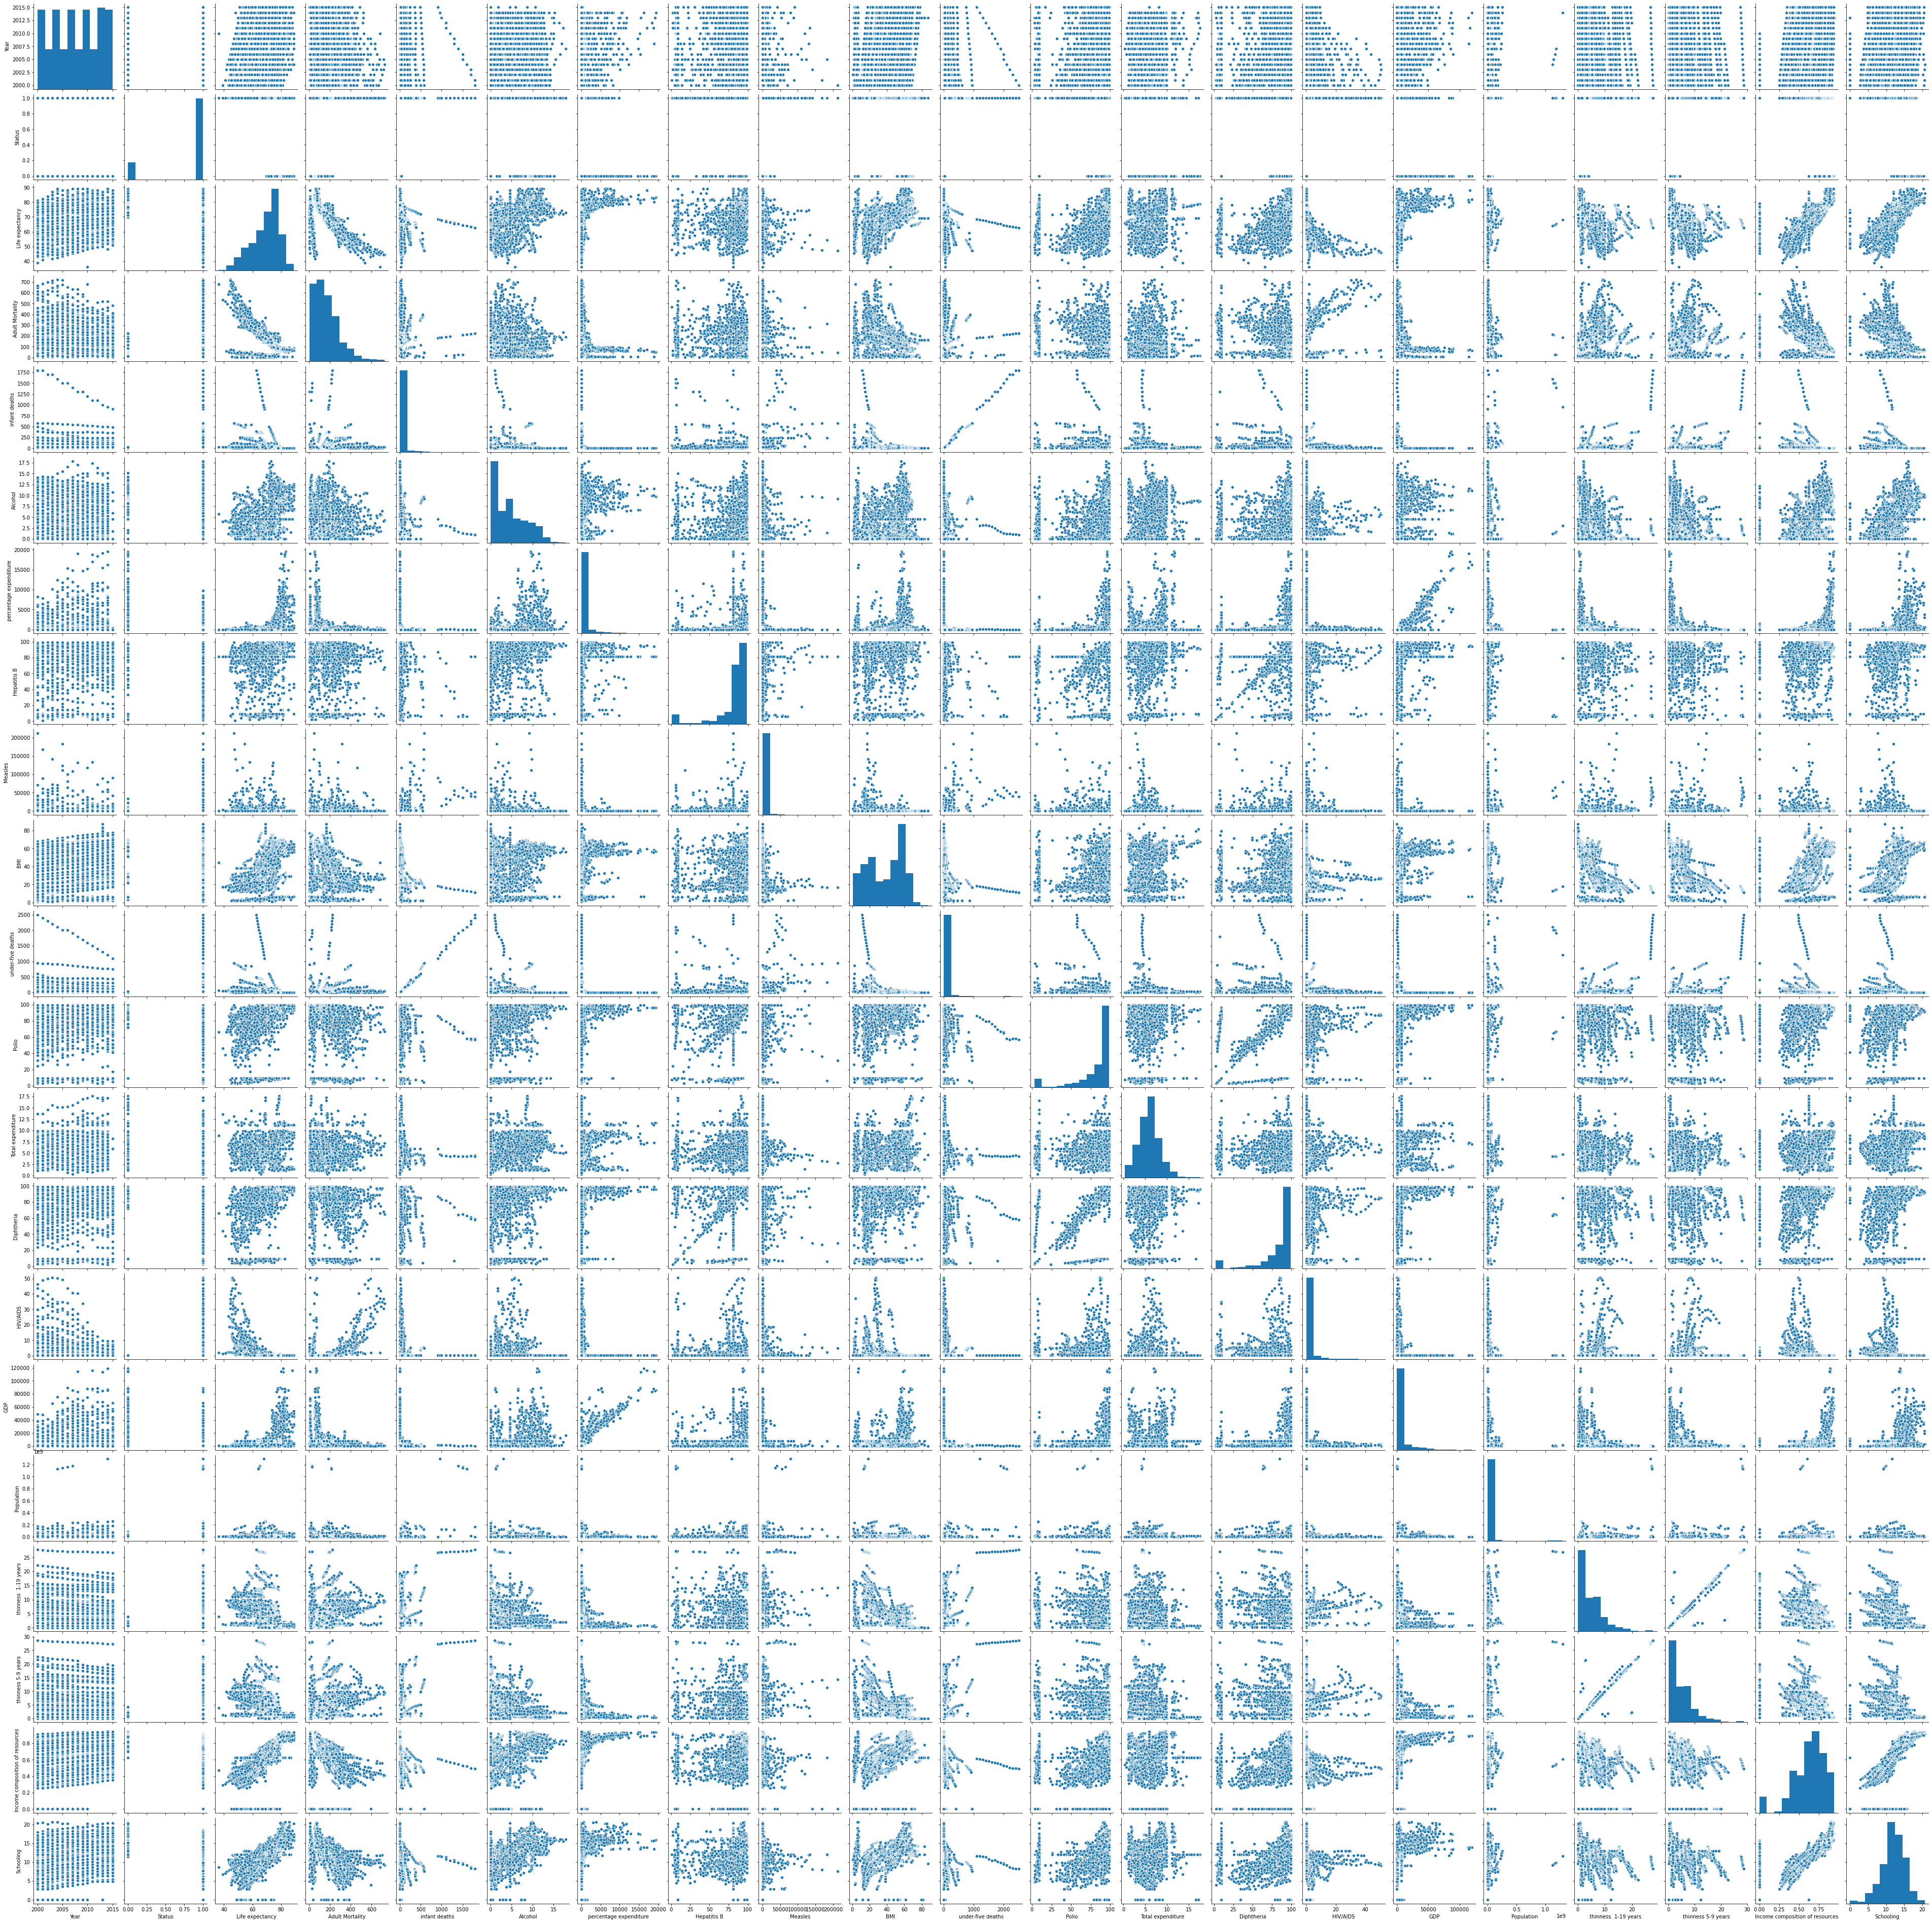

In [18]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(df[num_col])

Few of the features are having the linear relationship with y variable. So linear regression would be good approach for the same

## 6. Model Building

In [19]:
# Train test split
X=df.drop(columns=['Life expectancy','Country'])
y=df[['Life expectancy']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

## Approach 1 : Adding 1 varaible after 1

### Building model with 1 variable

In [20]:
# Select only one feature in regression model
X_train1 = X_train['Income composition of resources']

In [21]:
# Add a constant
X_train1 = sm.add_constant(X_train1)

# Create a first ols model
model_1 = sm.OLS(y_train, X_train1).fit()

In [22]:
# Check parameters created
model_1.params

const                              48.440947
Income composition of resources    33.059741
dtype: float64

In [23]:
# Summary of the model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1974.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          1.09e-302
Time:                        15:19:11   Log-Likelihood:                -6894.3
No. Observations:                2056   AIC:                         1.379e+04
Df Residuals:                    2054   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

R-squared is very less for the model, so there's a need to add more features as R-square itself is not able to explain the expenses

### Building model with 2 variable

In [24]:
# Add one more feature in regression model
X_train2 = X_train[['Income composition of resources','Schooling']]

In [25]:
# Add a constant
X_train2 = sm.add_constant(X_train2)

# Create second ols model
model_2 = sm.OLS(y_train, X_train2).fit()

In [26]:
# Check parameters created
model_2.params

const                              43.145928
Income composition of resources    16.273079
Schooling                           1.320315
dtype: float64

In [27]:
# Summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:19:16   Log-Likelihood:                -6738.3
No. Observations:                2056   AIC:                         1.348e+04
Df Residuals:                    2053   BIC:                         1.350e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

R-squared and Adj. R squared has increased for the model, but we can still improvise over it so let's add more features

### Building model with 3 variable

In [28]:
# Adding one more feature in regression model
X_train3 = X_train[['Income composition of resources','Schooling', 'Adult Mortality']]

In [29]:
# Add a constant
X_train3 = sm.add_constant(X_train3)

# Create third fitted model
model_3 = sm.OLS(y_train, X_train3).fit()

In [30]:
# Check parameters created
model_3.params

const                              56.227689
Income composition of resources    10.637516
Schooling                           1.003654
Adult Mortality                    -0.034790
dtype: float64

In [31]:
# Summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1765.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:19:21   Log-Likelihood:                -6275.3
No. Observations:                2056   AIC:                         1.256e+04
Df Residuals:                    2052   BIC:                         1.258e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

We have achieved a R-squared of `0.72` by manually picking the highly correlated variables.
Now lets use RFE to select the independent variables which accurately predicts the dependent variable `Life expectancy`.

## Approach 2 : RFE and eleminating by using p-value and VIF

In [32]:
# Running RFE with important column count to be 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', False, 2),
 ('Status', True, 1),
 ('Adult Mortality', True, 1),
 ('infant deaths', True, 1),
 ('Alcohol', True, 1),
 ('percentage expenditure', False, 3),
 ('Hepatitis B', True, 1),
 ('Measles', False, 5),
 ('BMI', True, 1),
 ('under-five deaths', True, 1),
 ('Polio', True, 1),
 ('Total expenditure', True, 1),
 ('Diphtheria', True, 1),
 ('HIV/AIDS', True, 1),
 ('GDP', False, 4),
 ('Population', False, 6),
 ('thinness  1-19 years', True, 1),
 ('thinness 5-9 years', True, 1),
 ('Income composition of resources', True, 1),
 ('Schooling', True, 1)]

In [34]:
# Selecting the important features (in the support)
imp_columns = X_train.columns[rfe.support_]
imp_columns

Index(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B',
       'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [35]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[imp_columns]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF  : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [36]:
random.seed(0)

# Add a constant
X_train_rfec = sm.add_constant(X_train_rfe)

# Build the model with RFE features
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     620.1
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:19:30   Log-Likelihood:                -5823.0
No. Observations:                2056   AIC:                         1.168e+04
Df Residuals:                    2040   BIC:                         1.177e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Since the p value for few of the features is not siginificant, we need to drop it but before that let's check the VIF score as well

In [37]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
6                 under-five deaths  178.16
2                     infant deaths  177.70
14                        Schooling   44.59
13  Income composition of resources   30.42
9                        Diphtheria   30.31
7                             Polio   26.28
11             thinness  1-19 years   19.47
12               thinness 5-9 years   19.31
4                       Hepatitis B   19.00
5                               BMI    8.28
8                 Total expenditure    7.74
0                            Status    7.13
1                   Adult Mortality    4.42
3                           Alcohol    4.35
10                         HIV/AIDS    1.70

Since the variable **thinness 5-9 years** is having a very high p value , we would remove the feature from training dataset

In [38]:
# Dropping insignificant variables

X_train_rfe1 = X_train_rfe.drop(['thinness 5-9 years'], 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     664.7
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:19:35   Log-Likelihood:                -5823.0
No. Observations:                2056   AIC:                         1.168e+04
Df Residuals:                    2041   BIC:                         1.176e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
6                 under-five deaths  177.82
2                     infant deaths  177.16
13                        Schooling   44.55
12  Income composition of resources   30.42
9                        Diphtheria   30.30
7                             Polio   26.28
4                       Hepatitis B   18.99
5                               BMI    8.19
8                 Total expenditure    7.74
0                            Status    7.10
1                   Adult Mortality    4.41
3                           Alcohol    4.35
11             thinness  1-19 years    4.07
10                         HIV/AIDS    1.70

Since the variable `under-five deaths` is having a very high VIF score, we would remove the feature from training dataset

In [40]:
# Dropping insignificant variables

X_train_rfe2 = X_train_rfe1.drop('under-five deaths', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     675.4
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:19:39   Log-Likelihood:                -5872.2
No. Observations:                2056   AIC:                         1.177e+04
Df Residuals:                    2042   BIC:                         1.185e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [41]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12                        Schooling  44.53
11  Income composition of resources  30.29
8                        Diphtheria  29.80
6                             Polio  26.22
4                       Hepatitis B  18.76
5                               BMI   8.19
7                 Total expenditure   7.73
0                            Status   7.06
1                   Adult Mortality   4.38
3                           Alcohol   4.23
10             thinness  1-19 years   4.07
9                          HIV/AIDS   1.69
2                     infant deaths   1.47

Since the variable `Alcohol` is having a very high p value, we would remove the feature from training dataset

In [42]:
# Dropping insignificant variables

X_train_rfe3 = X_train_rfe2.drop('Alcohol', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     732.0
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:19:43   Log-Likelihood:                -5872.2
No. Observations:                2056   AIC:                         1.177e+04
Df Residuals:                    2043   BIC:                         1.184e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11                        Schooling  42.11
10  Income composition of resources  30.28
7                        Diphtheria  29.80
5                             Polio  26.16
3                       Hepatitis B  18.73
4                               BMI   8.18
6                 Total expenditure   7.49
0                            Status   6.05
1                   Adult Mortality   4.30
9              thinness  1-19 years   3.96
8                          HIV/AIDS   1.69
2                     infant deaths   1.45

Since the variable **Schooling** is having a very high VIF score, we would remove the feature from training dataset

In [44]:
# Dropping insignificant variables

X_train_rfe4 = X_train_rfe3.drop('Schooling', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     716.7
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:19:50   Log-Likelihood:                -5961.9
No. Observations:                2056   AIC:                         1.195e+04
Df Residuals:                    2044   BIC:                         1.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7                        Diphtheria  29.69
5                             Polio  25.80
3                       Hepatitis B  18.59
10  Income composition of resources  13.90
4                               BMI   7.83
6                 Total expenditure   7.22
0                            Status   6.05
1                   Adult Mortality   4.30
9              thinness  1-19 years   3.95
8                          HIV/AIDS   1.69
2                     infant deaths   1.45

Since the variable `Diphtheria` is having a very high VIF score, we would remove the feature from training dataset

In [46]:
# Dropping insignificant variables

X_train_rfe5 = X_train_rfe4.drop('Diphtheria', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     748.8
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:19:55   Log-Likelihood:                -6004.1
No. Observations:                2056   AIC:                         1.203e+04
Df Residuals:                    2045   BIC:                         1.209e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Features    VIF
5                            Polio  17.90
3                      Hepatitis B  16.46
9  Income composition of resources  13.42
4                              BMI   7.82
6                Total expenditure   7.12
0                           Status   6.04
1                  Adult Mortality   4.29
8             thinness  1-19 years   3.95
7                         HIV/AIDS   1.69
2                    infant deaths   1.45

In [47]:
# Dropping insignificant variables

X_train_rfe6 = X_train_rfe5.drop('Polio', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     752.1
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:19:58   Log-Likelihood:                -6085.2
No. Observations:                2056   AIC:                         1.219e+04
Df Residuals:                    2046   BIC:                         1.225e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Features    VIF
3                      Hepatitis B  12.86
8  Income composition of resources  11.81
4                              BMI   7.70
5                Total expenditure   6.94
0                           Status   6.00
1                  Adult Mortality   4.29
7             thinness  1-19 years   3.92
6                         HIV/AIDS   1.69
2                    infant deaths   1.45

In [48]:
# Dropping insignificant variables

X_train_rfe7 = X_train_rfe6.drop('Hepatitis B', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     842.4
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:20:05   Log-Likelihood:                -6089.0
No. Observations:                2056   AIC:                         1.220e+04
Df Residuals:                    2047   BIC:                         1.225e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Features   VIF
7  Income composition of resources  9.62
3                              BMI  7.49
4                Total expenditure  6.53
0                           Status  5.56
1                  Adult Mortality  4.25
6             thinness  1-19 years  3.75
5                         HIV/AIDS  1.68
2                    infant deaths  1.41

## Approach 3 : Stepwise Regression

In [49]:
X_train.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [50]:
X_train.head()

Year  Status  Adult Mortality  infant deaths  Alcohol  \
270   2001       1             21.0              0     4.90   
1687  2011       1            124.0             34     5.30   
822   2011       1            197.0              2     2.37   
2030  2008       1            217.0             60     4.21   
363   2004       1             17.0             81     6.85   

      percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
270               251.658693         96.0        0  41.4                  0   
1687             1117.196097         98.0        3   6.8                 39   
822               549.278308         89.0        0  53.4                  2   
2030              155.476762         88.0      341  21.6                 78   
363               186.609049         96.0        0  46.9                 93   

      Polio  Total expenditure  Diphtheria  HIV/AIDS          GDP  \
270    96.0               4.50        96.0       0.4  3419.275719   
1687   97.0               6.40        97.0       0.1  9834.472689   
822     9.0               6.81        89.0       0.3  3736.587130   
2030   91.0               4.50        91.0       0.1  1919.466195   
363    99.0               7.70        99.0       0.1  3623.476670   

       Population  thinness  1-19 years  thinness 5-9 years  \
270      254984.0                   3.7                 3.7   
1687     119917.0                   1.6                 1.6   
822      619256.0                   1.7                 1.6   
2030    9751864.0                   1.0                 9.7   
363   184738458.0                   3.2                 3.2   

      Income composition of resources  Schooling  
270                             0.677       11.8  
1687                            0.745       12.6  
822                             0.666       13.0  
2030                            0.655       11.5  
363                             0.695       14.0

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 270 to 2863
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2056 non-null   int64  
 1   Status                           2056 non-null   int64  
 2   Adult Mortality                  2056 non-null   float64
 3   infant deaths                    2056 non-null   int64  
 4   Alcohol                          2056 non-null   float64
 5   percentage expenditure           2056 non-null   float64
 6   Hepatitis B                      2056 non-null   float64
 7   Measles                          2056 non-null   int64  
 8   BMI                              2056 non-null   float64
 9   under-five deaths                2056 non-null   int64  
 10  Polio                            2056 non-null   float64
 11  Total expenditure                2056 non-null   float64
 12  Diphtheria        

In [53]:
# python version 
# python --version

# python version (method 2)
from platform import python_version

print('python: {}'.format(python_version()))

#numpy version
print('numpy: {}'.format(np.version.version))

#pandas version
print('pandas: {}'.format(pd.__version__))

#seaborn version
print('seaborn: {}'.format(sns.__version__))

# matplotlib version
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

# sklearn version
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# statsmodels version
import statsmodels
print('statsmodels: {}'.format(statsmodels.__version__))

# statsmodels version
import imblearn 
print('imblearn : {}'.format(imblearn .__version__))

# Pandas also provides a utility function, pd.show_versions(), which reports the version of its dependencies as well:
# pd.show_versions(as_json=False)

python: 3.7.9
numpy: 1.15.4
pandas: 1.1.1
seaborn: 0.10.1
matplotlib: 3.3.1
The scikit-learn version is 0.19.2.
statsmodels: 0.11.1
imblearn : 0.3.1


In [54]:
## By David Dale https://datascience.stackexchange.com/users/24162/david-dale

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X_train, y_train)

print('resulting features:')
print(result)

Add                               6 with p-value 0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


KeyError: "None of [Int64Index([6], dtype='int64')] are in the [columns]"

In [55]:
X_train_stepwise = X_train[['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income composition of resources', 'Status', 'percentage expenditure', 'Polio', 'Measles', 'Hepatitis B', 'under-five deaths', 'infant deaths', 'thinness  1-19 years']]

# Adding a constant variable and Build a second fitted model

X_train_stepwise = sm.add_constant(X_train_stepwise)
lm_stepwise = sm.OLS(y_train, X_train_stepwise).fit()

#Summary of linear model
print(lm_stepwise.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     677.3
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:21:44   Log-Likelihood:                -5807.2
No. Observations:                2056   AIC:                         1.164e+04
Df Residuals:                    2041   BIC:                         1.173e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Model Prediction and Evaluation

In [56]:
# Predicting the price of training set.
X_test_stepwise = X_test[['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income composition of resources', 'Status', 'percentage expenditure', 'Polio', 'Measles', 'Hepatitis B', 'under-five deaths', 'infant deaths', 'thinness  1-19 years']]
X_test_stepwise = sm.add_constant(X_test_stepwise)
actual     = y_test["Life expectancy"]
prediction = lm_stepwise.predict(X_test_stepwise)

In [57]:
#Evaluvation: MSE
model_mse = mean_squared_error(prediction, actual)
print(model_mse)

15.972714682413027


In [58]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [59]:
mean_absolute_percentage_error(actual, prediction)

4.55824866620767

Text(0, 0.5, 'Predicted value')

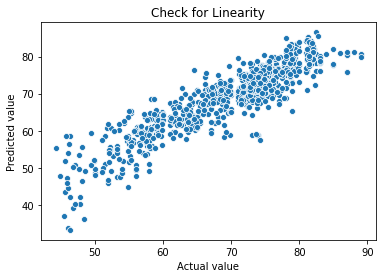

In [60]:
# Check for Linearity
sns.scatterplot(y_test['Life expectancy'],prediction)
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

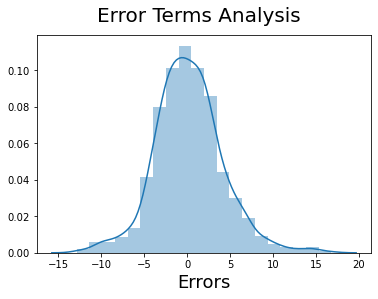

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test['Life expectancy'] - prediction), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)